# Classification Using Keras  
Richard Kuo, 20180706
ver. 0.2.0   
notebook - cnn-cifar10-keras.ipynb
pdf dir - /Users/rkuo/code/tensorflow/cnn-cifar10  

This is very similar to ccn-cifar10-tf model, all the housekeeping, import statements are the same; we will copy them here and replace the model building with Keras API. We will refactor some code too. 

We will build a simple model of

  2 convolution layer ,   
  1 pooling layer and   
  a fully connected layer.  
  
Code borrowed from:
- [Cifar-10 Classification using Keras Tutorial](https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/)
- [Object Recognition with Convolutional Neural Networks in the Keras Deep Learning Library](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/)
- [Convolutional Neural Networks (CNN) for CIFAR-10 Dataset](http://parneetk.github.io/blog/cnn-cifar10/)
- [Deep-math-machine-learning.ai](https://github.com/Madhu009/Deep-math-machine-learning.ai/blob/master/Neural_Networks/Convolutional_NN_Tensorflow.ipynb)
- [Keras code example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)



## Load and display dataset

After data loading, to verify and better understand the dataset; sample some them. For more complicate dataset, plot, explore the contents.
- shapes
- sizes
- sample values

In [2]:
# Loading the CIFAR-10 datasets
import keras
from keras.datasets import cifar10

# load data, instead of using the built-in function, this can be done with pyth
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


Using TensorFlow backend.


170500096/170498071 [==============================] - 26s 0us/step


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
50000  train samples
10000  test samples
Value of the first element of X_train:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
Value of the first element of Y_train:
[6]
X can be converted back to original images via utility function:


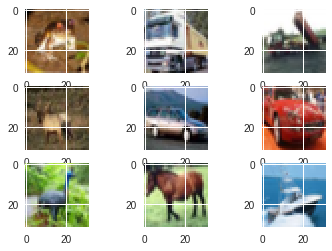

In [3]:
# Plot
import matplotlib.pyplot as plt
% matplotlib inline

from scipy.misc import toimage

import numpy as np

X_train  # tensor type
Y_train
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0],  ' test samples')
print("Value of the first element of X_train:")
print(X_train[0])
print("Value of the first element of Y_train:")
print(Y_train[0])
# create a grid of 3x3 images
print("X can be converted back to original images via utility function:")
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(toimage(X_train[i]))
# show the plot
plt.show()

## Pre-Process Data
The data may need to be pre-processed to  t ML library we want to use.

### Normalize
RBG value is range from 0-255. It would be easier to work from 0-1.

In [4]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255.0
X_test  /= 255.0
X_train[0]

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

The, we need to see what is train label Y_train looks like.


In [5]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

It is a 50000 integer array.
Double check!

In [6]:
print(Y_train[0], Y_train[49999])

[6] [1]


### One_hot vector

We need to convert Y_train to one_hot vector, from 50000 x 1 to 50000 x 10, for example, the first row from [6] to [0,0,0,0,0,1,0,0,0,0]. We can use a keras' utility keras.utils.np_utils.to_categorical, see [discussion about to_categorical](https://stackoverflow.com/questions/41494625/issues-using-keras-np-utils-to-categorical/43314437).

In [8]:
# create one hot vector
from keras.utils import to_categorical, np_utils

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

Y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Keras Model

[input (X)] -> [convolution] -> [convolution] -> [pooling] -> [Dense-relu] -> [Dense-softmax]

In [0]:
#build the cnn model 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.layers import Flatten

import numpy as np
def model():
    model=Sequential()
    
    model.add(Convolution2D(32,3,3,activation='relu',input_shape=(3,32,32),border_mode='same',W_constraint=maxnorm(3)))
    
    #model.add(Dropout(0.2))
    model.add(Convolution2D(32,3,3,activation='relu',input_shape=(3,32,32),border_mode='same',W_constraint=maxnorm(3)))
    
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu',W_constraint=maxnorm(3)))
    #model.add(Dropout(0.5))
    
    model.add(Dense(10,activation='softmax'))
    
    return model

In [11]:

epochs = 10
lrate = 0.01
decay = lrate/epochs
from keras.optimizers import SGD
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model=model()
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(3, 32, 32..., padding="same", kernel_constraint=<keras.con...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(3, 32, 32..., padding="same", kernel_constraint=<keras.con...)`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 16, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 286,282
Trainable params: 286,282
Non-trainable params: 0
_________________________________________________________________
None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`


In [14]:
# reshape input data per keras
X_train = X_train.reshape(-1,3,32,32)
X_test = X_test.reshape(-1,3,32,32)

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 564us/step - loss: 1.7564 - acc: 0.3666 - val_loss: 1.5659 - val_acc: 0.4402
Epoch 2/10
12384/50000 [======>.......................] - ETA: 18s - loss: 1.5562 - acc: 0.4446

50000/50000 [==============================] - 27s 539us/step - loss: 1.5183 - acc: 0.4597 - val_loss: 1.4830 - val_acc: 0.4696
Epoch 3/10
37664/50000 [=====================>........] - ETA: 6s - loss: 1.4287 - acc: 0.4933

50000/50000 [==============================] - 27s 534us/step - loss: 1.4238 - acc: 0.4939 - val_loss: 1.4113 - val_acc: 0.4935
Epoch 4/10
48000/50000 [===========================>..] - ETA: 1s - loss: 1.3621 - acc: 0.5159

50000/50000 [==============================] - 27s 531us/step - loss: 1.3620 - acc: 0.5157 - val_loss: 1.3871 - val_acc: 0.5048
Epoch 5/10
46112/50000 [==========================>...] - ETA: 2s - loss: 1.3133 - acc: 0.5370

50000/50000 [==============================] - 28s 562us/step - loss: 1.3152 - acc: 0.5362 - val_loss: 1.3558 - val_acc: 0.5170
Epoch 6/10
50000/50000 [==============================] - 26s 528us/step - loss: 1.2799 - acc: 0.5450 - val_loss: 1.3387 - val_acc: 0.5211
Epoch 7/10
  416/50000 [..............................] - ETA: 24s - loss: 1.2503 - acc: 0.5361

50000/50000 [==============================] - 25s 496us/step - loss: 1.2488 - acc: 0.5569 - val_loss: 1.3302 - val_acc: 0.5218
Epoch 8/10
37248/50000 [=====================>........] - ETA: 5s - loss: 1.2199 - acc: 0.5679

50000/50000 [==============================] - 24s 486us/step - loss: 1.2200 - acc: 0.5684 - val_loss: 1.3200 - val_acc: 0.5323
Epoch 9/10
50000/50000 [==============================] - 24s 488us/step - loss: 1.1972 - acc: 0.5733 - val_loss: 1.3175 - val_acc: 0.5273
Epoch 10/10
  672/50000 [..............................] - ETA: 23s - loss: 1.1663 - acc: 0.5878

50000/50000 [==============================] - 25s 498us/step - loss: 1.1742 - acc: 0.5838 - val_loss: 1.3116 - val_acc: 0.5305
Accuracy: 53.05%
